In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

 Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [3]:
df =pd.read_csv("sales_data_with_discounts.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [6]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [7]:
df.info

<bound method DataFrame.info of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount

In [8]:
numerical_col=df.select_dtypes(include=["int","float"]).columns

In [9]:
numerical_col

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [10]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
df.size 

5850

In [12]:
stats= {}
for column in numerical_col:
    stats[column]={
        "mean":df[column].mean(),
        "median": df[column].median(),
        "mode": df[column].mode()[0],
        "STD": df[column].std() }
for column, values in stats.items():
     print(f"\n{column}:")
     for stat, value in values.items():
         print(f"{stat}: {value:.2f}")


Volume:
mean: 5.07
median: 4.00
mode: 3.00
STD: 4.23

Avg Price:
mean: 10453.43
median: 1450.00
mode: 400.00
STD: 18079.90

Total Sales Value:
mean: 33812.84
median: 5700.00
mode: 24300.00
STD: 50535.07

Discount Rate (%):
mean: 15.16
median: 16.58
mode: 5.01
STD: 4.22

Discount Amount:
mean: 3346.50
median: 988.93
mode: 69.18
STD: 4509.90

Net Sales Value:
mean: 30466.34
median: 4677.79
mode: 326.97
STD: 46358.66


Volume:
mean: 5.07
median: 4.00
mode: 3.00
STD: 4.23

Avg Price:
mean: 10453.43
median: 1450.00
mode: 400.00
STD: 18079.90

Total Sales Value:
mean: 33812.84
median: 5700.00
mode: 24300.00
STD: 50535.07

Discount Rate (%):
mean: 15.16
median: 16.58
mode: 5.01
STD: 4.22

Discount Amount:
mean: 3346.50
median: 988.93
mode: 69.18
STD: 4509.90

Net Sales Value:
mean: 30466.34
median: 4677.79
mode: 326.97
STD: 46358.66

Data visualizations

 * Histograms:

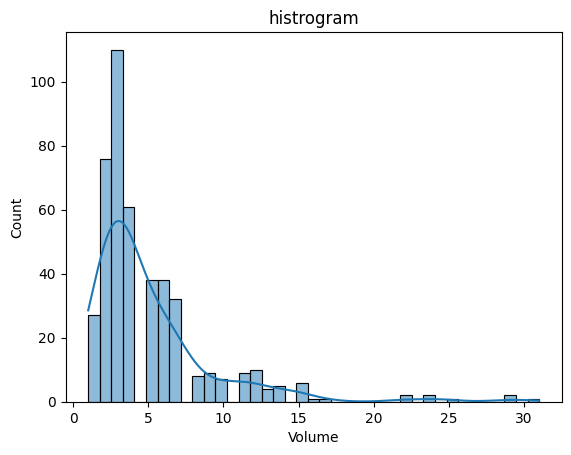

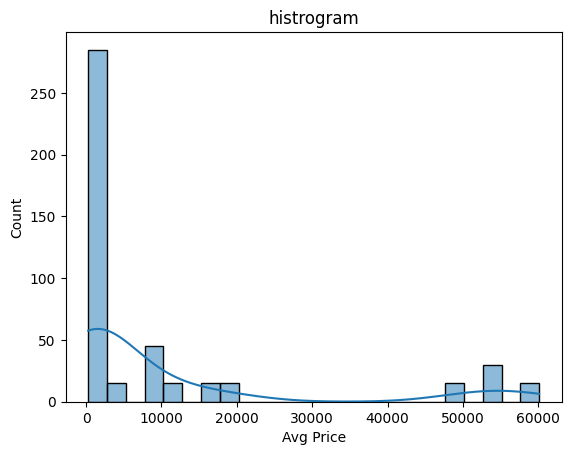

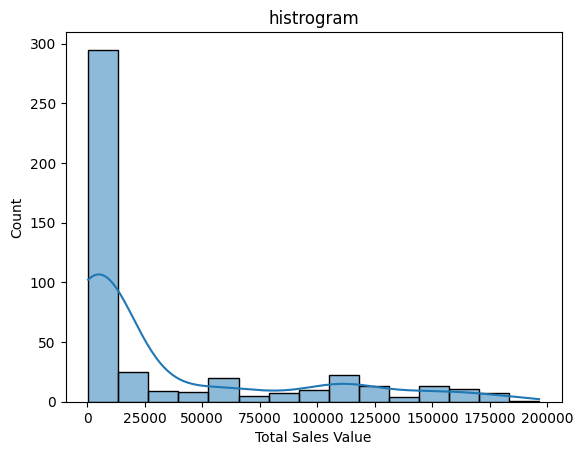

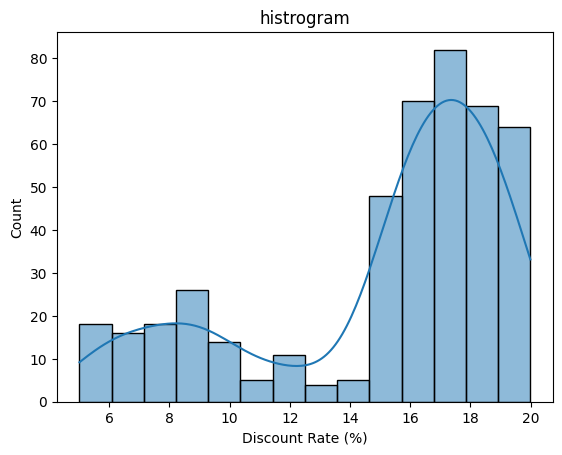

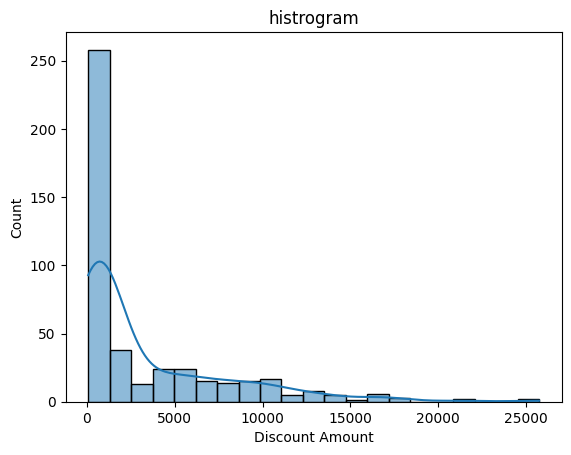

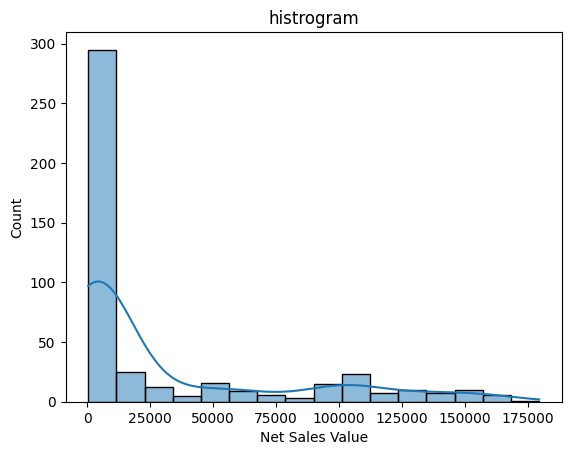

In [13]:
for col in numerical_col:
    sns.histplot(df[col], kde=True)
    plt.title(f"histrogram")
    plt.show()

* Boxplots:


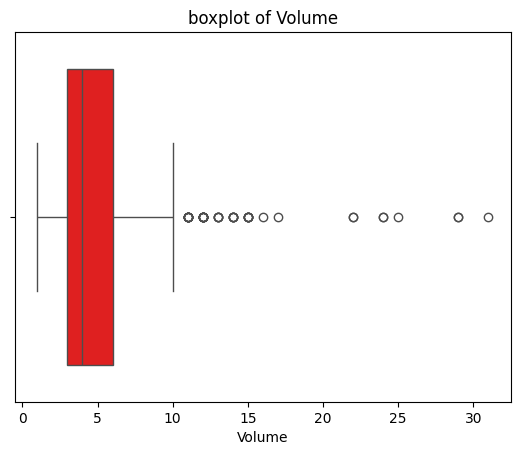

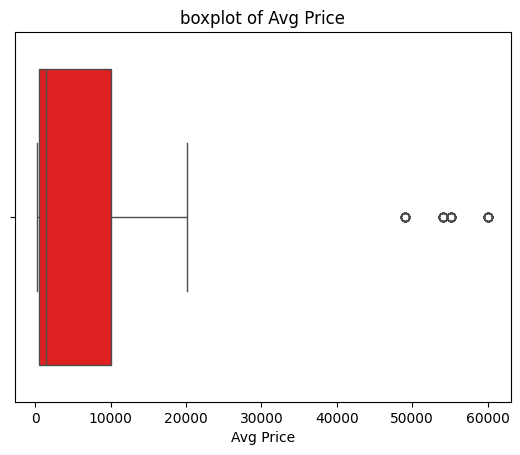

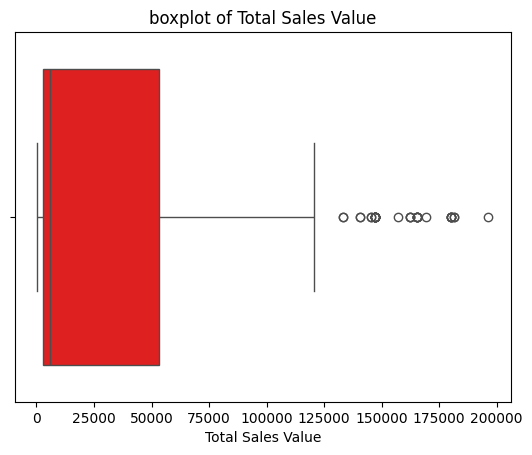

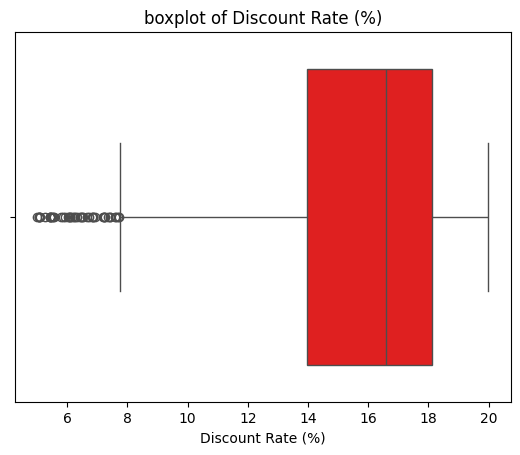

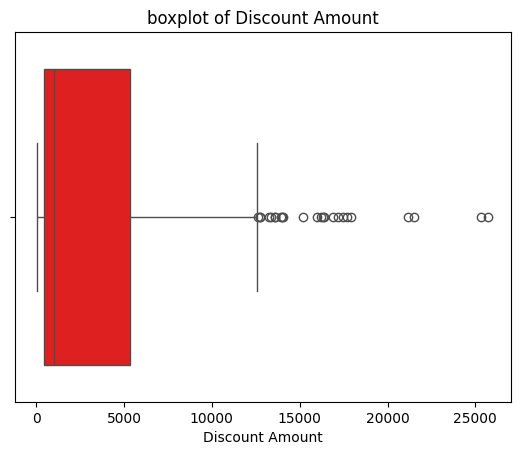

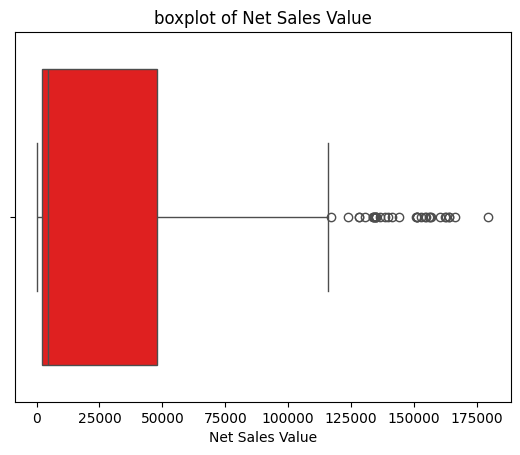

In [28]:
for col in numerical_col:
    sns.boxplot(x=df[col],color='red')
    plt.title(f"boxplot of {col}")
    plt.xlabel(col)
    plt.show()

* Bar chart Analysis for Categorical column :

In [31]:
categorical_col=df.select_dtypes(include=['object']).columns

In [32]:
categorical_col

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [33]:
df[categorical_col]

,Date,Day,SKU,City,BU,Brand,Model
0,01-04-2021,Thursday,M01,C,Mobiles,RealU,RU-10
1,01-04-2021,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,01-04-2021,Thursday,M03,C,Mobiles,YouM,YM-99
3,01-04-2021,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,01-04-2021,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,15-04-2021,Thursday,L07,C,Lifestyle,Viva,W-Western
447,15-04-2021,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,15-04-2021,Thursday,L09,C,Lifestyle,Jeera,M-Formals


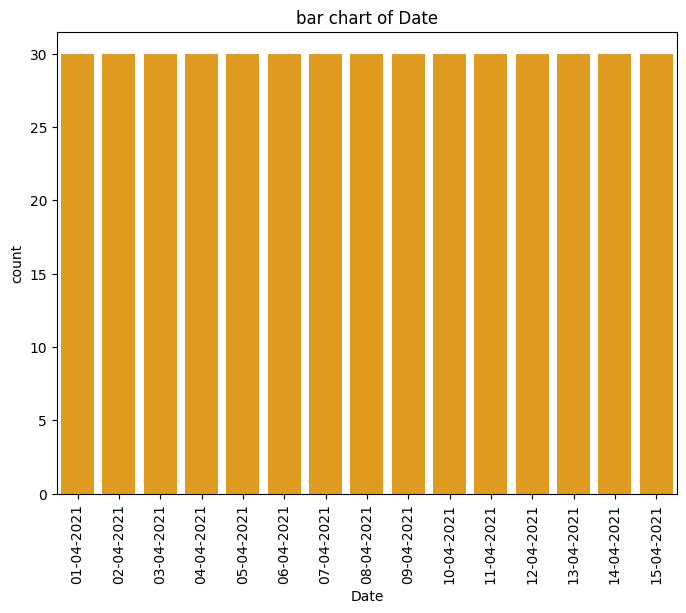

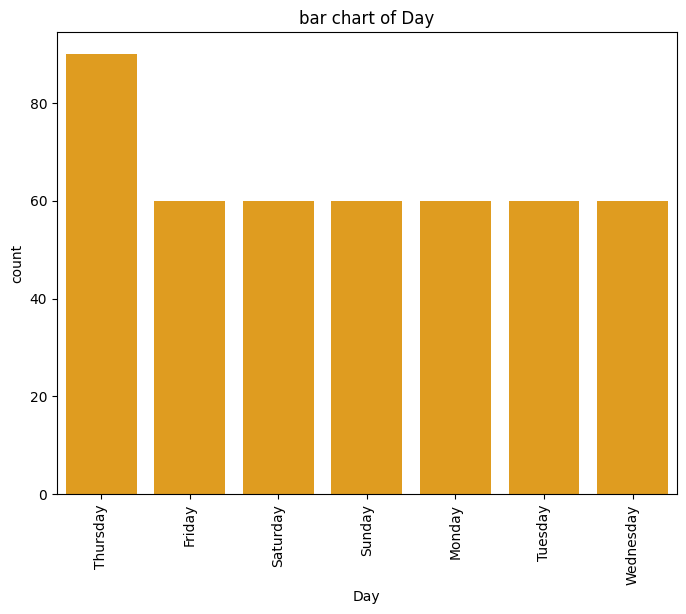

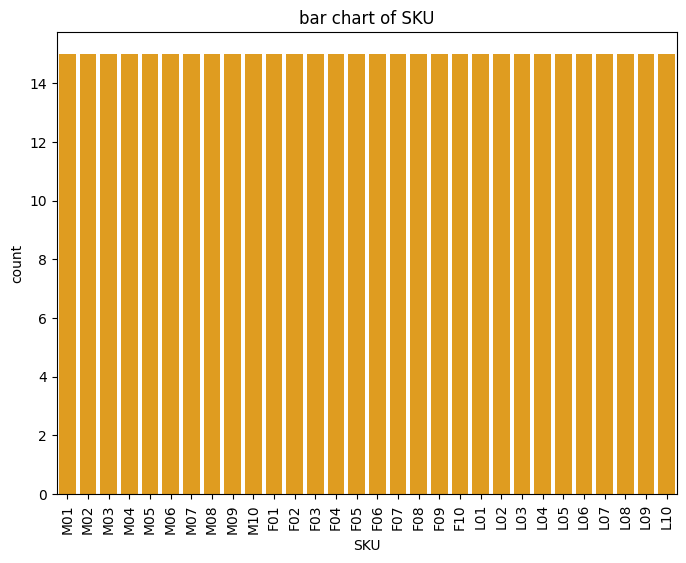

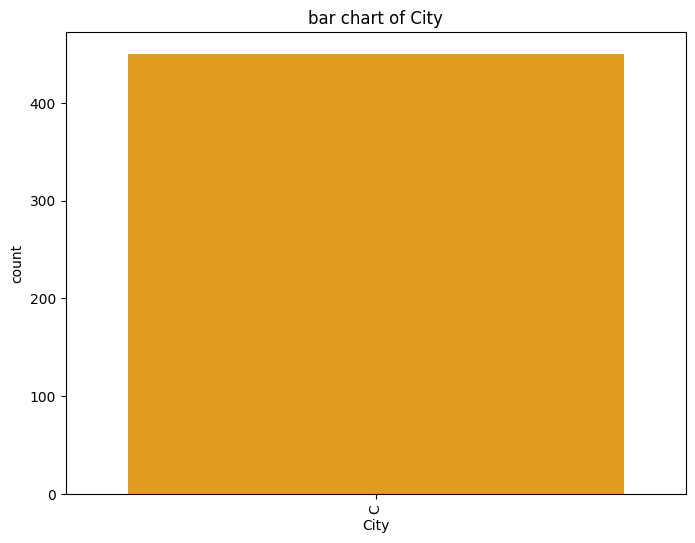

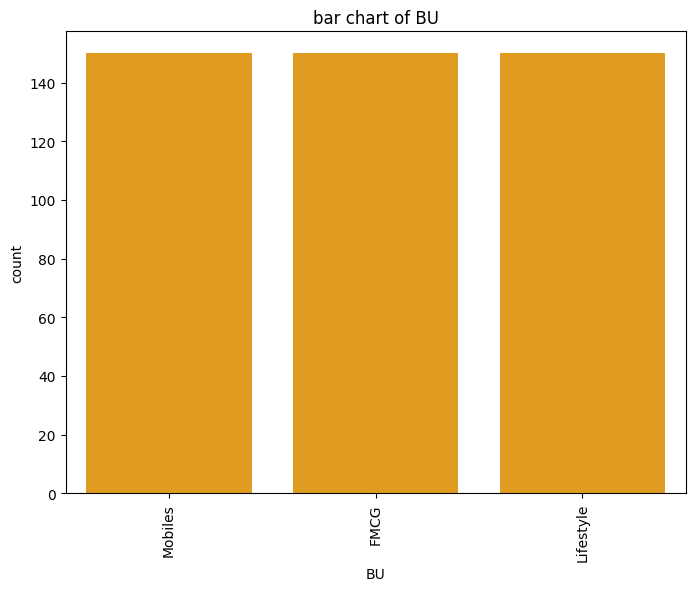

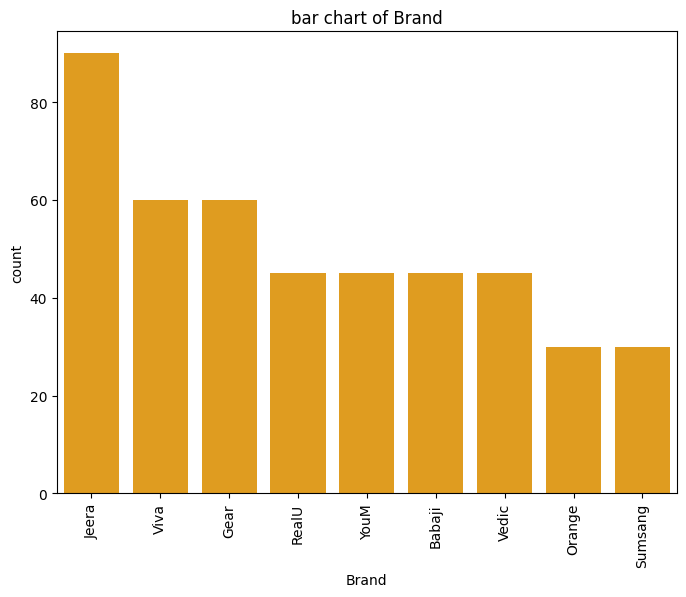

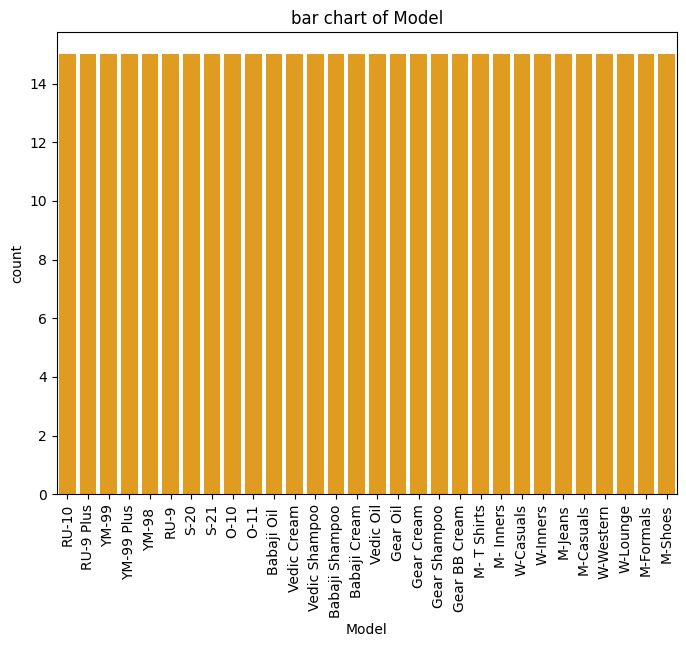

In [49]:
for col in categorical_col:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df,x=col,color='orange',order=df[col].value_counts().index)
    plt.title(f'bar chart of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

Conclusion:

1. Statistical Summary

* The dataset’s numerical variables (like Sales and Discount) showed their averages, medians, and variability.

* A noticeable difference between mean and median in some columns indicates skewness in the data distribution.

2. Distribution Insights

* Histograms revealed that numerical variables vary in their distribution — some are skewed with outliers, while others are more evenly distributed.

* Standard deviation values suggest that sales amounts vary widely, while discounts are more stable.

3. Outliers

* Boxplots identified several outliers in sales, which could represent either special cases (bulk purchases, big discounts) or possible data entry issues.

4. Categorical Analysis

* Bar charts showed that certain categories (e.g., specific product lines or regions) dominate the dataset.

* Some categories had very few records, which might affect analysis reliability

5. overall Insight
   
* the data provides useful trends but needs preprocessing(handling missing values, treating outliers, encodig categorical columns) before advanced analysis or modeling.